In [1]:
#Dependencies and Set up 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Study data files
Vaccine_df = "COVID-19_Vaccinations.csv"

# Read the mouse data and the study results
Vaccine_df = pd.read_csv(Vaccine_df, low_memory=False)


In [2]:
Vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959498 entries, 0 to 1959497
Data columns (total 80 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Date                                     object 
 1   FIPS                                     object 
 2   MMWR_week                                int64  
 3   Recip_County                             object 
 4   Recip_State                              object 
 5   Completeness_pct                         float64
 6   Administered_Dose1_Recip                 float64
 7   Administered_Dose1_Pop_Pct               float64
 8   Administered_Dose1_Recip_5Plus           float64
 9   Administered_Dose1_Recip_5PlusPop_Pct    float64
 10  Administered_Dose1_Recip_12Plus          float64
 11  Administered_Dose1_Recip_12PlusPop_Pct   float64
 12  Administered_Dose1_Recip_18Plus          float64
 13  Administered_Dose1_Recip_18PlusPop_Pct   float64
 14  Administered_Dose1

In [3]:
Vaccine_df = Vaccine_df.replace(np.nan,0)

In [4]:
Vaccine_df.head

<bound method NDFrame.head of                Date   FIPS  MMWR_week       Recip_County Recip_State  \
0        05/03/2023  48493         18      Wilson County          TX   
1        05/03/2023  17123         18    Marshall County          IL   
2        05/03/2023  54087         18       Roane County          WV   
3        05/03/2023  20121         18       Miami County          KS   
4        05/03/2023  19103         18     Johnson County          IA   
...             ...    ...        ...                ...         ...   
1959493  12/13/2020  46017         51     Buffalo County          SD   
1959494  12/13/2020  13271         51     Telfair County          GA   
1959495  12/13/2020  48297         51    Live Oak County          TX   
1959496  12/13/2020  13289         51      Twiggs County          GA   
1959497  12/13/2020  51830         51  Williamsburg city          VA   

         Completeness_pct  Administered_Dose1_Recip  \
0                    98.9                   31351.

In [5]:
#Create a new DataFrame with only needed columns
Vaccine_df2 = Vaccine_df [['Recip_State', 'Series_Complete_Pop_Pct', 'Metro_status']]
Vaccine_df2.head()

,Recip_State,Series_Complete_Pop_Pct,Metro_status
0,TX,53.8,Metro
1,IL,58.7,Metro
2,WV,49.2,Non-metro
3,KS,50.4,Metro
4,IA,77.0,Metro


In [6]:
# Labels for the sections of our pie chart
labels = ["Metro", "Non-Metro"]

# The values of each section of the pie chart
sizes = [5, 6]

# The colors of each section of the pie chart
colors = ["red", "blue","green"]
explode = (0.1, 0)

In [7]:
#Renameing Columns
Vaccine_df2 = Vaccine_df2.rename(columns={'Recip_State': 'State',
                                         'Series_Complete_Pop_Pct': 'Completed Series Vaccine %',
                                        'Metro_status': 'Metro Status' })
Vaccine_df2.head()

,State,Completed Series Vaccine %,Metro Status
0,TX,53.8,Metro
1,IL,58.7,Metro
2,WV,49.2,Non-metro
3,KS,50.4,Metro
4,IA,77.0,Metro


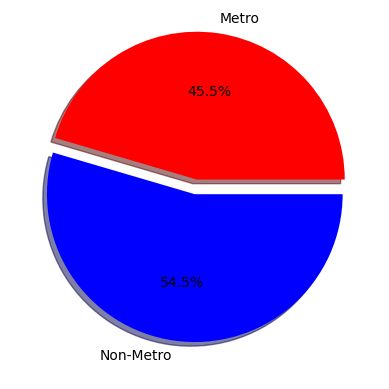

In [8]:
# Creates the pie chart based upon the values above and figures out percentage 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, )
plt.savefig('piechart')

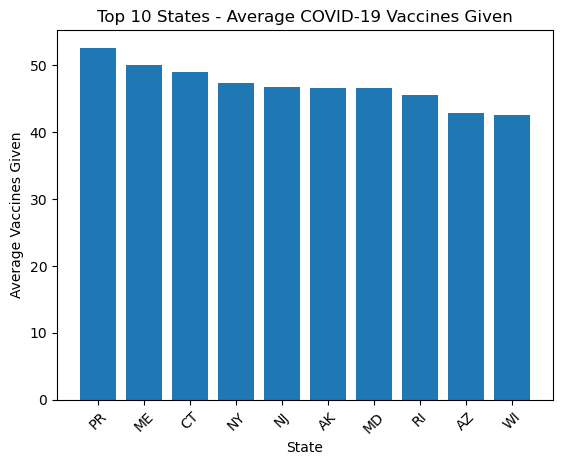

In [9]:
Vaccine_df2 = Vaccine_df2.groupby('State')['Completed Series Vaccine %'].mean()

# Sort the data to identify the top 10 states
top_10_states = Vaccine_df2.sort_values(ascending=False).head(10)

# Create a bar chart
plt.bar(top_10_states.index, top_10_states.values)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average Vaccines Given')
plt.title('Top 10 States - Average COVID-19 Vaccines Given')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.savefig('barchart')
# Display the bar chart
plt.show()
